In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv("StudentsPerformance.csv")  

print(df.head(5))
print(df.info())
print(df.describe())
print(df.columns)


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


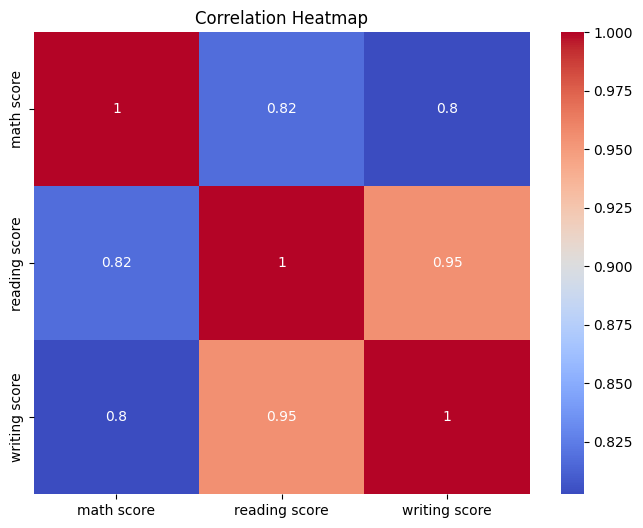

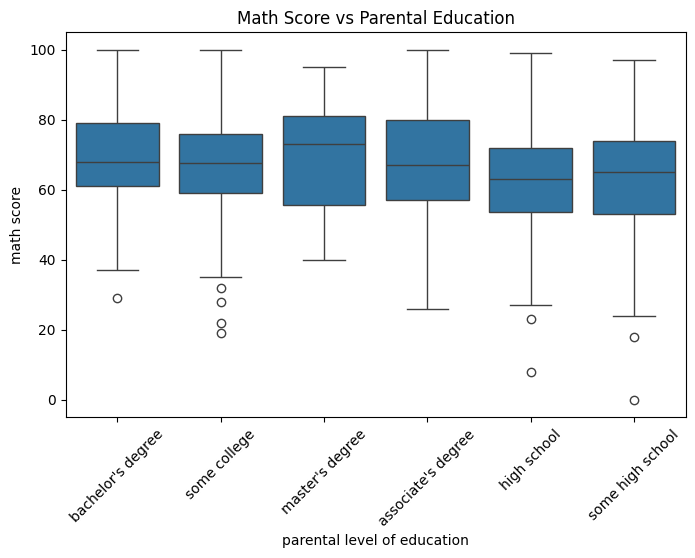

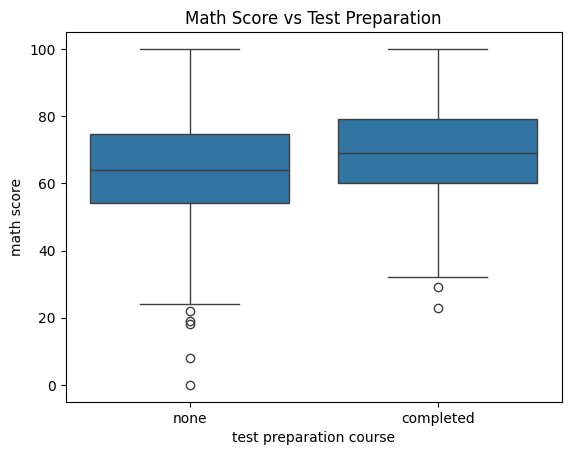

In [63]:
print("Missing values:\n", df.isnull().sum())

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title("Math Score vs Parental Education")
plt.show()

sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title("Math Score vs Test Preparation")
plt.show()


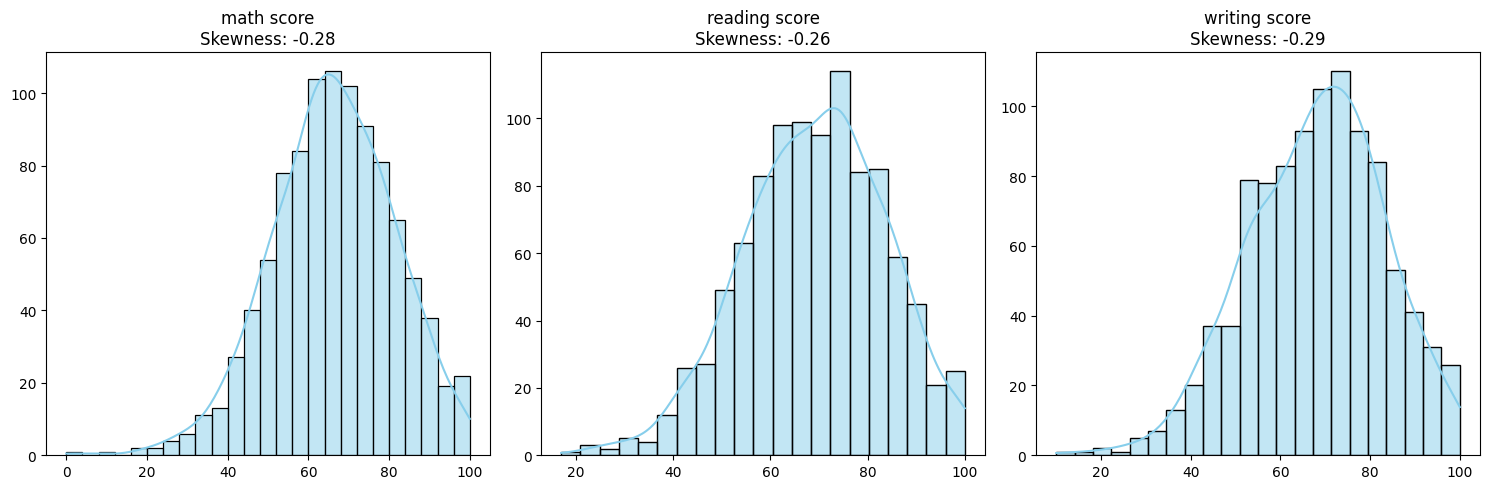

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots
plt.figure(figsize=(15, 5))

# Plot each numerical column
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col}\nSkewness: {df[col].skew():.2f}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


<Axes: xlabel='reading score', ylabel='math score'>

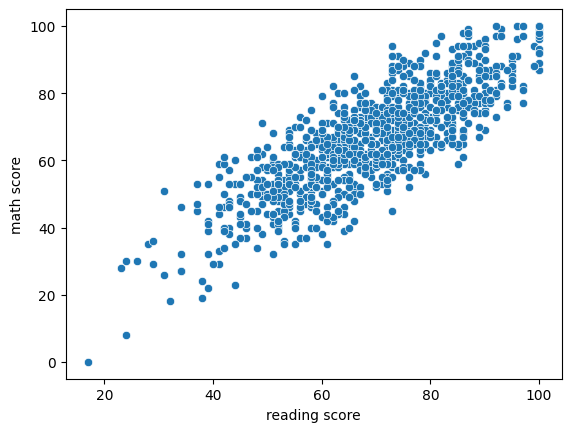

In [65]:
sns.scatterplot(x='reading score', y='math score', data=df)

In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


data = df.copy()  

categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns detected:", categorical_cols)


encoders = {}


for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le 

data.head()


Categorical columns detected: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


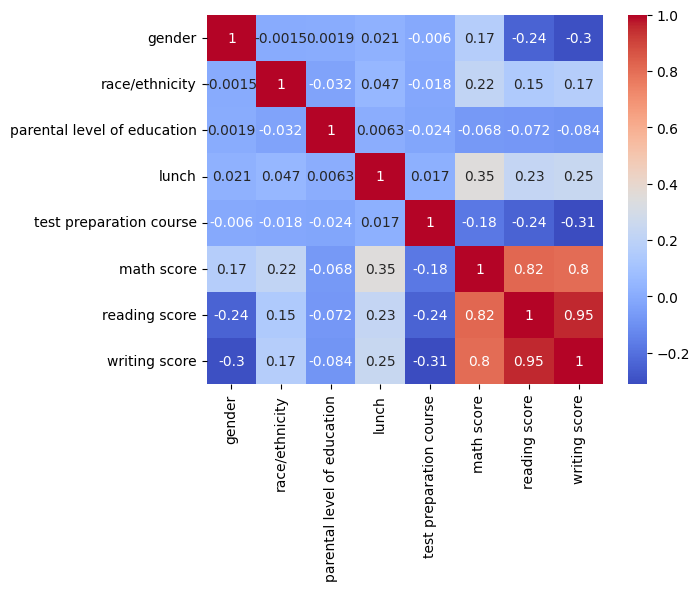

In [67]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [68]:
X = data[['gender','race/ethnicity','parental level of education','lunch','test preparation course','reading score','writing score']]
y = data['math score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)



print("R² (test):", round(r2, 4))




R² (test): 0.8838


In [69]:
import joblib
joblib.dump(lr, 'linear_model.pkl')
joblib.dump(encoders, 'encoders.pkl')



['encoders.pkl']

In [70]:
encoders

{'gender': LabelEncoder(),
 'race/ethnicity': LabelEncoder(),
 'parental level of education': LabelEncoder(),
 'lunch': LabelEncoder(),
 'test preparation course': LabelEncoder()}